<a href="https://colab.research.google.com/github/Moises788/LAMP-IC-UFRN/blob/main/Data_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mudanças e Melhorias a serem feitas**#
* Identificar e corrigir o problema do timestemp


##Bibliotecas Utilizadas

In [61]:
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib as mcolors
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [62]:
dados_controle =  'https://raw.githubusercontent.com/Moises788/LAMP-IC-UFRN/main/Rodada441/dados.csv'
dados_rede = 'https://raw.githubusercontent.com/Moises788/LAMP-IC-UFRN/main/Rodada441/pwlogger.csv'

### Pré processamento das variáveis

In [63]:
#Leitura e conversão de tempo do dataframe de controle
data = pd.read_csv(dados_controle)
#data['Date'] = "2022-08-16 " + data['Date'] 
data['Date'] = pd.to_datetime(data['Date'])

#Leitura e conversão de t empo do dataframe de rede
rede = pd.read_csv(dados_rede)
rede['Date'] = pd.to_datetime(rede['Date'])


In [64]:
print(rede.shape)
print(data.shape)

(426, 11)
(2955, 5)


In [65]:
rede.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DPDU Tx,426.0,2267.476526,1543.455456,0.0,1208.0,1987.0,3235.0,5830.0
DPDU Tx Fail,426.0,218.769953,218.094461,0.0,47.0,166.0,235.0,719.0
DPDU Rx,426.0,863.455399,1002.125555,0.0,60.0,163.0,1715.0,3039.0
DPDU Rx Fail,426.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
RSSI,426.0,-89.744131,35.026414,-192.0,-90.0,-86.0,-71.0,-59.0


In [66]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LV1,2955.0,99.999137,2.765740,0.0,99.72,100.26,100.45,108.58
SPVolt,2955.0,99.966159,1.839591,0.0,100.00,100.00,100.00,100.00
Output,2955.0,581.832149,14.596314,0.0,576.00,583.00,586.00,605.00
ST_Lv1,2955.0,93.310321,52.137670,0.0,20.00,128.00,128.00,128.00


In [67]:
device01 = rede
device05 = rede

indexNames01 = device01[ device01['Devices'] == 'TT-IS-05' ].index #pega as linhas do sensor 05
indexNames05 = device05[ device05['Devices'] == 'LD-IS-01' ].index #pega as linhas do sensor 01

In [68]:
print(indexNames01.shape)
print(indexNames05.shape)

(222,)
(204,)


In [69]:
device01 = device01.drop(indexNames01) #Exclui os sensores 05
device05 = device05.drop(indexNames05) #Exclui os sensore 01

In [70]:
print(device01.shape)
print(device05.shape)

(204, 11)
(222, 11)


In [71]:
device01 = device01.drop(columns = ['Neighbors', 'Clock Source' , 'Link Status','DPDU Rx',	'DPDU Rx Fail'])
device05 = device05.drop(columns = ['Neighbors', 'Clock Source' , 'Link Status','DPDU Rx',	'DPDU Rx Fail'])

In [72]:
print(device01.shape)
print(device05.shape)

(204, 6)
(222, 6)


##Calculo de PDR

In [75]:
device05.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DPDU Tx,222.0,3013.342342,1728.779715,0.0,1812.00,3235.0,4345.0,5830.0
DPDU Tx Fail,222.0,208.585586,213.516007,0.0,45.00,159.0,206.0,610.0
RSSI,222.0,-90.887387,39.182609,-192.0,-88.75,-86.0,-68.0,-59.0


In [82]:
PDRI05 = (device05['DPDU Tx']/(device05['DPDU Tx']+device05['DPDU Tx Fail'])) * 100 #Eviado/(Eviado+Perdido)
PDRI01 = (device01['DPDU Tx']/(device01['DPDU Tx']+device01['DPDU Tx Fail'])) * 100 #Eviado/(Eviado+Perdido)

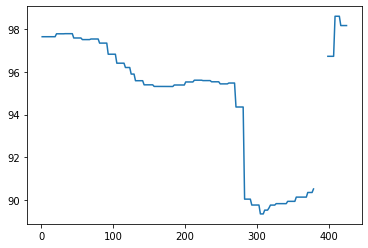

In [83]:
plt.plot(PDRI05)

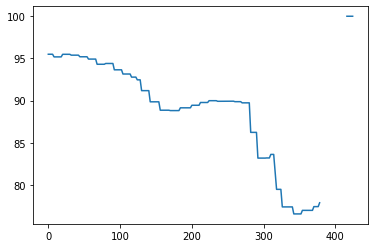

In [80]:
plt.plot(PDRI01)

#Realiza junção dos sensores em um só dataframe

In [ ]:
#device05 =device05.drop('Date', axis=1)
rede = pd.merge(device01, device05, how='left', on='Date')
rede.shape

(204, 15)

In [ ]:
data.index = pd.to_datetime(data['Date'])
rede.index = pd.to_datetime(rede['Date'])

data.drop("Date", inplace=True, axis=1)
rede.drop("Date", inplace=True, axis=1)

df = data.merge(rede, right_index = True,left_index = True, how = 'outer')
df=df.reset_index()

In [ ]:
df.drop("LV1", inplace=True, axis=1)
df.drop("Output", inplace=True, axis=1)
df.drop("SPVolt", inplace=True, axis=1)
tempo = df['Date']
df.drop("Date", inplace=True, axis=1)

In [ ]:
rede = pd.read_csv(dados_rede)
rede['Date'] = pd.to_datetime(rede['Date'])
rede = pd.merge(device01, device05, how='left', on='Date')
#rede.drop("Date", inplace=True, axis=1)


In [ ]:
rodada = 0
indicie_rede = 0
completo = pd.DataFrame()
lista = []
for indicie, linha in df.iterrows():
    if df.loc[indicie].isnull().values.any() == True:
      #indicie_rede += 1  
      if rodada == 0:  
        indicie_rede = 0
      lista.append(indicie_rede)
    else:
      if rodada == 0:
        indicie_rede = 0
        rodada = 1
      else:
        indicie_rede += 1
    completo = completo.append(rede.loc[indicie_rede], ignore_index= True) 

In [ ]:
data = pd.read_csv(dados_controle)
data['Date'] = pd.to_datetime(data['Date'])
df = data.merge(completo, left_index=True, right_index=True, how = 'outer')
#df.to_csv('DadosCompletos.csv')
df = df.dropna()
df['Date'] = tempo


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LV1,2955.0,99.999137,2.765740,0.0,99.72,100.26,100.45,108.58
SPVolt,2955.0,99.966159,1.839591,0.0,100.00,100.00,100.00,100.00
Output,2955.0,581.832149,14.596314,0.0,576.00,583.00,586.00,605.00
ST_Lv1,2955.0,93.310321,52.137670,0.0,20.00,128.00,128.00,128.00
DPDU Tx_x,2955.0,1712.478173,723.852839,0.0,1142.00,1987.00,2394.00,2531.00
DPDU Tx Fail_x,2955.0,339.344839,274.929426,0.0,84.00,224.00,716.00,719.00
DPDU Rx_x,2955.0,110.043993,63.949361,0.0,52.00,132.00,174.00,191.00
DPDU Rx Fail_x,2955.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.00
RSSI_x,2955.0,-83.277496,28.513811,-192.0,-90.00,-81.00,-63.00,-61.00
DPDU Tx_y,2955.0,3885.041624,1670.454507,59.0,2517.00,4345.00,5554.00,5830.00


In [ ]:

tempo = df["Date"]
Nivel_tank = df["LV1"]
Saida = df["Output"]
Setpoint = df["SPVolt"]

#tempo = tempo.astype(str)

tempo_rede = tempo

DPDU_Tx01 = df['DPDU Tx_x']
DPDU_Tx_Fail01 = df['DPDU Tx Fail_x']
RSSI_rede01 = df['RSSI_x']

DPDU_Tx05 = df['DPDU Tx_y']
DPDU_Tx_Fail05 = df['DPDU Tx Fail_y']
RSSI_rede05 = df['RSSI_y']




In [ ]:
df2 =pd.DataFrame({"pacotes enviados 01":DPDU_Tx01,
                   "pacotes perdidos 01":DPDU_Tx_Fail01})

df3 = pd.DataFrame({ "pacotes enviados 05":DPDU_Tx05,
                   "pacotes perdidos 05":DPDU_Tx_Fail05})

df2

,pacotes enviados 01,pacotes perdidos 01
0,551.0,26.0
1,551.0,26.0
2,551.0,26.0
3,551.0,26.0
4,551.0,26.0
...,...,...
2950,9.0,0.0
2951,9.0,0.0
2952,9.0,0.0
2953,9.0,0.0


Código abaixo responsável por realizar o cálculo de perda real de pacote

In [ ]:
#Expressão para realizar calculo de perda de pacote
rodada = True
delta_df = pd.DataFrame()
perdaPacote = pd.DataFrame()
for indicie, linha in df.iterrows():
    if indicie+1 < len(df2):
        if (df2['pacotes enviados 01'].iloc[indicie] == df2['pacotes enviados 01'].iloc[indicie+1]) and rodada:
            delta_df = df2.loc[indicie] - df2.loc[indicie]
        elif df2['pacotes enviados 01'].iloc[indicie] != df2['pacotes enviados 01'].iloc[indicie+1]:
            delta_df = df2.iloc[indicie+1] - df2.iloc[indicie]
            rodada = False
            #perdaPacote = perdaPacote.append(df2.loc[indicie], ignore_index= True)
        elif (df2['pacotes enviados 01'].iloc[indicie] == df2['pacotes enviados 01'].iloc[indicie+1]) and not(rodada):
            delta_df
        
        perdaPacote = perdaPacote.append(delta_df, ignore_index= True)

perdaPacote = perdaPacote.append(delta_df, ignore_index= True)
DPDU_Tx_Fail01 = perdaPacote["pacotes perdidos 01"]
DPDU_Tx01 = perdaPacote["pacotes enviados 01"]               


In [ ]:
#Expressão para realizar calculo de perda de pacote
rodada = True
delta_df = pd.DataFrame()
perdaPacote = pd.DataFrame()
for indicie, linha in df.iterrows():
    if indicie+1 < len(df3):
        if (df3['pacotes enviados 05'].iloc[indicie] == df3['pacotes enviados 05'].iloc[indicie+1]) and rodada:
            delta_df = df3.loc[indicie] - df3.loc[indicie]
        elif df3['pacotes enviados 05'].iloc[indicie] != df3['pacotes enviados 05'].iloc[indicie+1]:
            delta_df = df3.iloc[indicie+1] - df3.iloc[indicie]
            rodada = False
        elif (df3['pacotes enviados 05'].iloc[indicie] == df3['pacotes enviados 05'].iloc[indicie+1]) and not(rodada):
            delta_df
        
        perdaPacote = perdaPacote.append(delta_df, ignore_index= True)

perdaPacote = perdaPacote.append(delta_df, ignore_index= True)       
DPDU_Tx_Fail05 = perdaPacote["pacotes perdidos 05"]
DPDU_Tx05 = perdaPacote["pacotes enviados 05"]  



In [ ]:
erro = (abs(Nivel_tank-Setpoint)/Setpoint)*100
DPDU_Total01 = DPDU_Tx01 + DPDU_Tx_Fail01
DPDU_Total05 = DPDU_Tx05 + DPDU_Tx_Fail05
PDRI01 = (DPDU_Tx01/DPDU_Total01) * 100
PDRI05 = (DPDU_Tx05/DPDU_Total05) * 100
Saida = Saida*(3.3/1024)


In [ ]:
tempo

0      2022-10-19 10:41:49
1      2022-10-19 10:42:00
2      2022-10-19 10:42:01
3      2022-10-19 10:42:02
4      2022-10-19 10:42:03
               ...        
2950   2022-10-19 11:31:09
2951   2022-10-19 11:31:10
2952   2022-10-19 11:31:11
2953   2022-10-19 11:31:12
2954   2022-10-19 11:31:13
Name: Date, Length: 2955, dtype: datetime64[ns]

### Plot dos gráficos

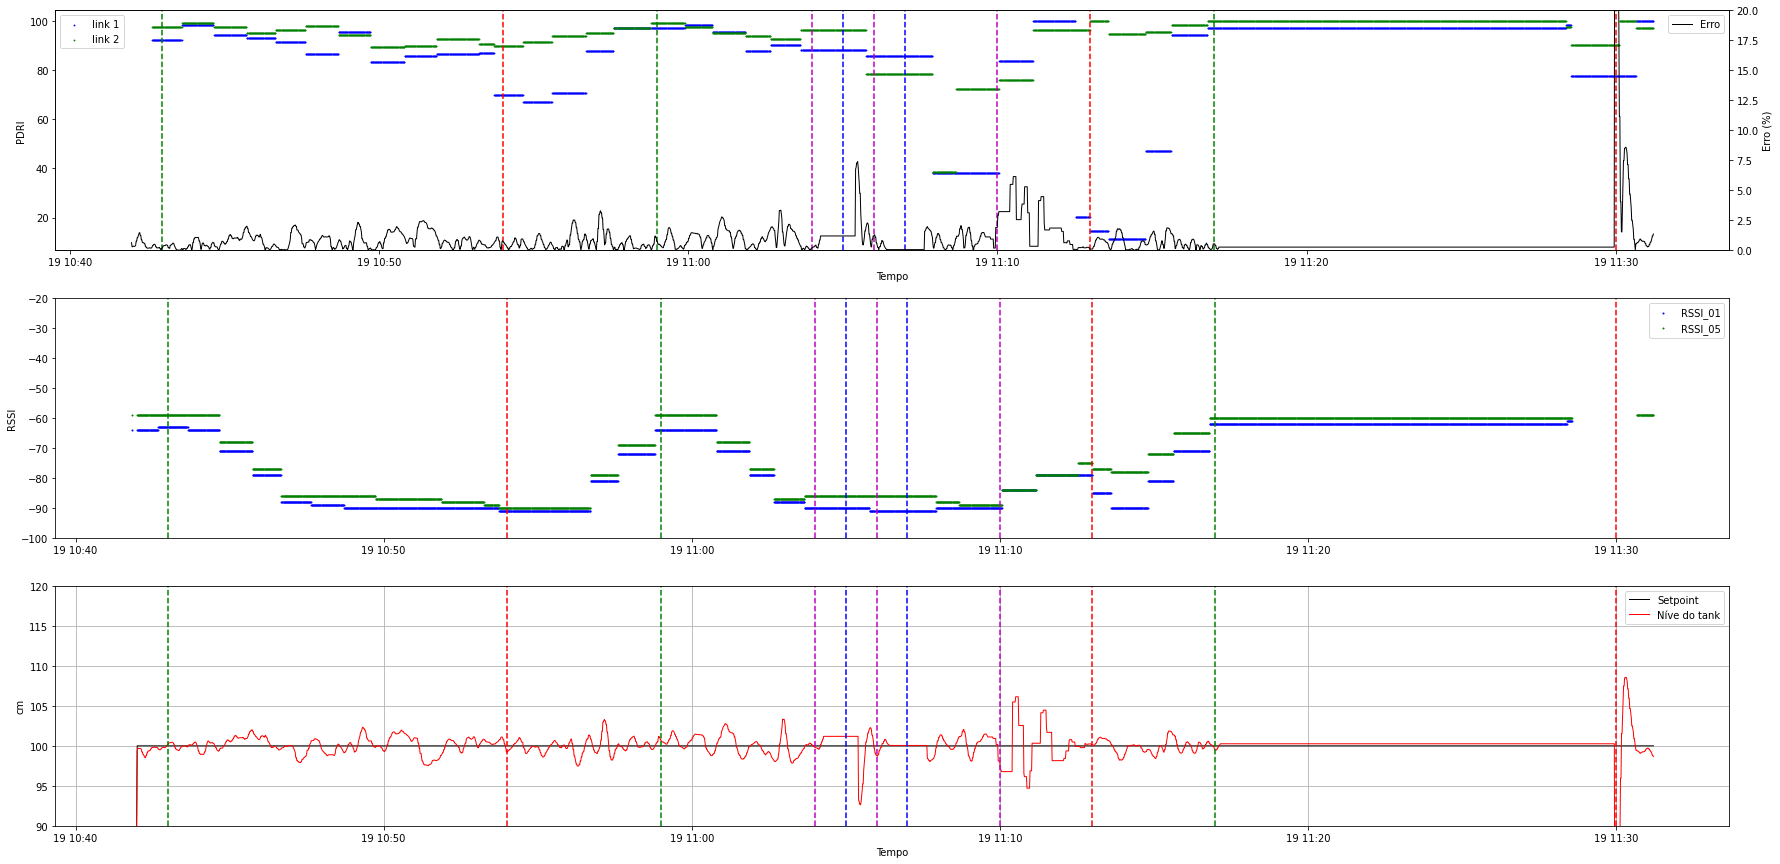

In [ ]:

fig, ax= plt.subplots(nrows=3, ncols=1, figsize=(30,15))


ax[0].scatter(tempo_rede, PDRI01, label = 'link 1', color = '#0000FF', s= 0.7)
ax[0].scatter(tempo_rede, PDRI05, label = 'link 2', color = '#008000', s= 0.7)

ax[0].set_xlabel('Tempo')
ax[0].set_ylabel('PDRI')
ax[0].legend(['link 1', 'link 2', 'Erro'], loc='upper left')

aux = ax[0].twinx() #método para criar dois eixos y
aux.plot(tempo, erro, label = 'Erro', color = 'black', linewidth=1)
aux.legend()
aux.set_ylabel('Erro (%)')
aux.set_ylim(0, 20)

#ax[0].legend(handles=[line1], loc='upper right')

ax[1].scatter(tempo_rede, RSSI_rede01, label = 'RSSI_01', s= 1, color = '#0000FF')
ax[1].scatter(tempo_rede, RSSI_rede05, label = 'RSSI_05', s= 1, color = '#008000')
ax[1].set_ylim(ymin = -100, ymax= -20)
ax[1].set_ylabel('RSSI')
ax[1].legend() #legenda do gráfico

ax[2].plot(tempo, Setpoint, label = 'Setpoint', color = 'black', linewidth=1)
ax[2].plot(tempo, Nivel_tank, label = 'Níve do tank', color = 'red', linewidth=1)
ax[2].legend() #legenda do gráfico
ax[2].set_xlabel('Tempo')
ax[2].set_ylabel('cm')
ax[2].set_ylim(ymin = 90, ymax= 120)
ax[2].grid(True)
#(13h36, 13h45; 13h53, 13h 57, 14h03; 14h16, 14h20, 14h29; 14h40, 14h43, 14h49 )

for i in range(3):
  ax[i].axvline(pd.Timestamp("2022-10-19 10:43:00"),ls='--', color = 'g')
  ax[i].axvline(pd.Timestamp("2022-10-19 10:54:00"),ls='--', color = 'r')

  ax[i].axvline(pd.Timestamp("2022-10-19 10:59:00"),ls='--', color = 'g')

  ax[i].axvline(pd.Timestamp("2022-10-19 11:04:00"),ls='--', color = 'm')
  ax[i].axvline(pd.Timestamp("2022-10-19 11:05:00"),ls='--', color = 'b')
  
  ax[i].axvline(pd.Timestamp("2022-10-19 11:06:00"),ls='--', color = 'm')
  ax[i].axvline(pd.Timestamp("2022-10-19 11:07:00"),ls='--', color = 'b')

  ax[i].axvline(pd.Timestamp("2022-10-19 11:10:00"),ls='--', color = 'm')

  ax[i].axvline(pd.Timestamp("2022-10-19 11:13:00"),ls='--', color = 'r')

  ax[i].axvline(pd.Timestamp("2022-10-19 11:17:00"),ls='--', color = 'g')
  ax[i].axvline(pd.Timestamp("2022-10-19 11:30:00"),ls='--', color = 'r')



plt.legend()
figrede = plt.gcf() 
plt.show()

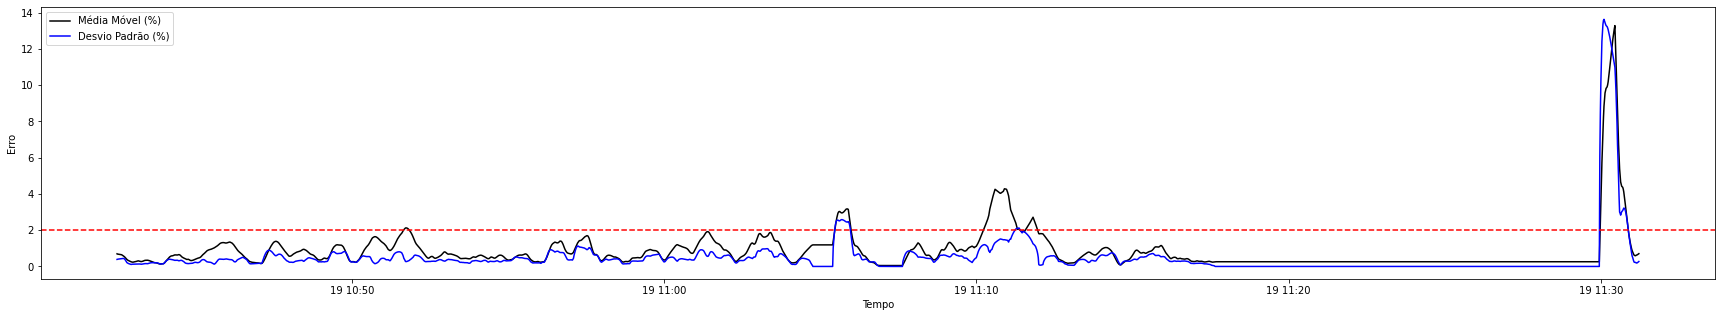

In [ ]:
#Aplicando média móvel na análise
erro_movel = erro.rolling(30).mean()
erro_desvio_padrao = erro.rolling(30).std()

fig, ax= plt.subplots( figsize=(30,5))

ax.plot(tempo, erro_movel, color='black', label = 'Média Móvel (%)')
ax.plot(tempo, erro_desvio_padrao, color='blue', label = 'Desvio Padrão (%)')

ax.set_xlabel('Tempo')
ax.set_ylabel('Erro')
ax.axhline(2,ls='--', color = 'r')

#ax.axvline(pd.Timestamp("2022-08-16  16:24:00"),ls='--', color = 'g')
#ax.axvline(pd.Timestamp("2022-08-16  16:33:00"),ls='--', color = 'r')
#ax.axvline(pd.Timestamp("2022-08-16  16:40:00"),ls='--', color = 'g')
#ax.axvline(pd.Timestamp("2022-08-16  16:45:00"),ls='--', color = 'r')

plt.legend()

In [ ]:
df_final = pd.DataFrame({ "data":tempo,
                          "RSSI_0":RSSI_rede01,
                          "RSSI_1":RSSI_rede05,
                          "PDRI_0":PDRI01,
                          "PDRI_1":PDRI05,
                          "erro":erro
                        })
df_final.sample(7)

,data,RSSI_0,RSSI_1,PDRI_0,PDRI_1,erro
2183,2022-10-19 11:18:22,-62.0,-60.0,97.142857,100.000000,0.26
901,2022-10-19 10:57:00,-81.0,-79.0,87.837838,95.238095,0.34
145,2022-10-19 10:44:24,-64.0,-59.0,98.484848,99.248120,0.39
251,2022-10-19 10:46:10,-79.0,-77.0,93.150685,95.238095,1.33
225,2022-10-19 10:45:44,-71.0,-68.0,93.150685,95.238095,2.00
2760,2022-10-19 11:27:59,-62.0,-60.0,97.142857,100.000000,0.26
728,2022-10-19 10:54:07,-91.0,-90.0,69.879518,89.808917,0.40


In [ ]:
figrede.savefig('plot_dados.pdf', format='pdf')
df_final.to_csv('Dados_para_modelo.csv')